In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
from tests.uniform import Unif
from tests.normal import Norm

In [5]:
unif = Unif(0, 1)



In [14]:

np.fft.irfft(np.exp(0 * 1j * t - (1 * (t ** 2)) / 2))

array([4.91495743e-03, 4.91458444e-03, 4.91346565e-03, 4.91160157e-03,
       4.90899305e-03, 4.90564126e-03, 4.90154775e-03, 4.89671436e-03,
       4.89114329e-03, 4.88483708e-03, 4.87779859e-03, 4.87003100e-03,
       4.86153782e-03, 4.85232292e-03, 4.84239043e-03, 4.83174485e-03,
       4.82039098e-03, 4.80833391e-03, 4.79557906e-03, 4.78213215e-03,
       4.76799920e-03, 4.75318651e-03, 4.73770070e-03, 4.72154863e-03,
       4.70473749e-03, 4.68727471e-03, 4.66916799e-03, 4.65042532e-03,
       4.63105492e-03, 4.61106528e-03, 4.59046513e-03, 4.56926342e-03,
       4.54746936e-03, 4.52509237e-03, 4.50214211e-03, 4.47862841e-03,
       4.45456136e-03, 4.42995119e-03, 4.40480838e-03, 4.37914354e-03,
       4.35296749e-03, 4.32629120e-03, 4.29912582e-03, 4.27148264e-03,
       4.24337308e-03, 4.21480873e-03, 4.18580129e-03, 4.15636258e-03,
       4.12650454e-03, 4.09623921e-03, 4.06557873e-03, 4.03453534e-03,
       4.00312134e-03, 3.97134912e-03, 3.93923112e-03, 3.90677986e-03,
      

In [16]:
p = (np.sqrt(41) -5) / 8
a = (2*p)/(1-p)
np.fft.irfft((t+2)+(1-p)*(1-np.exp(-t/a)))

array([ 1.30322652e+02, -5.16764147e+01, -1.95736266e-03, -5.74414457e+00,
       -1.95694781e-03, -2.06956250e+00, -1.95625706e-03, -1.05717707e+00,
       -1.95529141e-03, -6.40556896e-01, -1.95405227e-03, -4.29663755e-01,
       -1.95254143e-03, -3.08368270e-01, -1.95076106e-03, -2.32265833e-01,
       -1.94871372e-03, -1.81404710e-01, -1.94640234e-03, -1.45741268e-01,
       -1.94383022e-03, -1.19772393e-01, -1.94100099e-03, -1.00277767e-01,
       -1.93791863e-03, -8.52710763e-02, -1.93458746e-03, -7.34731893e-02,
       -1.93101211e-03, -6.40302081e-02, -1.92719749e-03, -5.63544588e-02,
       -1.92314882e-03, -5.00307625e-02, -1.91887159e-03, -4.47590620e-02,
       -1.91437153e-03, -4.03181379e-02, -1.90965462e-03, -3.65419981e-02,
       -1.90472705e-03, -3.33041232e-02, -1.89959524e-03, -3.05067163e-02,
       -1.89426577e-03, -2.80732197e-02, -1.88874540e-03, -2.59430115e-02,
       -1.88304105e-03, -2.40675848e-02, -1.87715977e-03, -2.24077549e-02,
       -1.87110873e-03, -

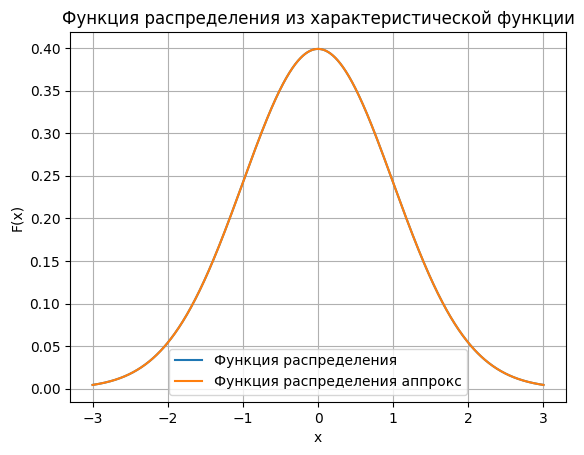

In [50]:
import numpy as np

def characteristic_function(t):
    # Пример характеристической функции (например, для стандартного нормального распределения)
    return np.exp(-0.5 * t**2)

def pdf(x, num_points=1000):
    # Определяем диапазон для интегрирования
    t = np.linspace(-10, 10, num_points)
    
    # Вычисляем характеристическую функцию
    phi_t = characteristic_function(t)
    
    # Вычисляем функцию распределения через обратное преобразование Фурье
    # Используем формулу: F(x) = (1 / (2 * pi)) * ∫[−∞, ∞] phi(t) * exp(itx) dt
    integral = np.trapezoid(phi_t * np.exp(1j * t * x), t)

    
    # Возвращаем вещественную часть интеграла, умноженную на 1/(2*pi)
    return (1 / (2 * np.pi)) * integral

# Пример использования
x_values = np.linspace(-3, 3, 1000)
distribution_values = [pdf(x) for x in x_values]

# Для визуализации результата можно использовать matplotlib
import matplotlib.pyplot as plt

df_true = norm.pdf(x_values, 0, 1)
plt.plot(x_values, df_true, label='Функция распределения')
plt.plot(x_values, distribution_values, label='Функция распределения аппрокс')
plt.title('Функция распределения из характеристической функции')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1024,)

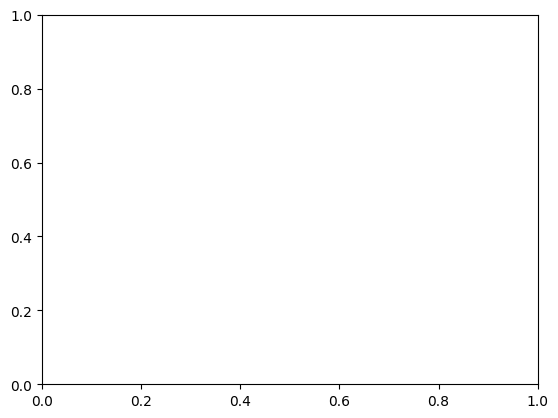

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def characteristic_function_uniform(t, a, b):
    """Характеристическая функция равномерного распределения."""
    return (np.sin((b - a) * t / 2) / ((b - a) * t / 2)) * np.exp(-1j * (a + b) * t / 2)

def inverse_fourier_transform(cf, num_points=1024):
    """Обратное преобразование Фурье для получения функции распределения."""
    # Создаем ось частот
    t = np.linspace(-np.pi, np.pi, num_points)
    # Вычисляем обратное преобразование Фурье
    f_x = np.fft.ifft(cf).real
    return f_x

def compute_distribution(a, b, num_points=1024):
    """Вычисление функции распределения по характеристической функции."""
    # Определяем точки для характеристической функции
    t = np.linspace(-np.pi, np.pi, num_points)
    # Вычисляем характеристическую функцию
    cf = characteristic_function_uniform(t, a, b)
    # Получаем функцию распределения через обратное преобразование Фурье
    distribution = inverse_fourier_transform(cf, num_points)
    return distribution

# Параметры равномерного распределения
a = 0
b = 1

# Вычисление функции распределения
distribution = compute_distribution(a, b)

# Визуализация функции распределения
x = np.linspace(a, b, 100)
cumulative_distribution = np.cumsum(distribution) * (x[1] - x[0])  # Нормируем

plt.plot(x, cumulative_distribution)
plt.title('Функция распределения для равномерного распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.xlim(a - 0.1, b + 0.1)
plt.ylim(-0.1, 1.1)
plt.axhline(1, color='r', linestyle='--', label='F(x)=1')
plt.axvline(a, color='g', linestyle='--', label='a')
plt.axvline(b, color='g', linestyle='--', label='b')
plt.legend()
plt.show()

In [53]:
!pip3 list

Package           Version
----------------- -----------
appnope           0.1.4
asttokens         3.0.0
comm              0.2.2
contourpy         1.3.1
cycler            0.12.1
debugpy           1.8.11
decorator         5.1.1
executing         2.1.0
fonttools         4.55.3
ipykernel         6.29.5
ipython           8.31.0
jedi              0.19.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.8
matplotlib        3.10.0
matplotlib-inline 0.1.7
mpmath            1.3.0
nest-asyncio      1.6.0
numpy             2.2.1
packaging         24.2
pandas            2.2.3
parso             0.8.4
pexpect           4.9.0
pillow            11.1.0
pip               24.3.1
platformdirs      4.3.6
prompt_toolkit    3.0.48
psutil            6.1.1
ptyprocess        0.7.0
pure_eval         0.2.3
Pygments          2.19.1
pyparsing         3.2.1
python-dateutil   2.9.0.post0
pytz              2024.2
pyzmq             26.2.0
scipy             1.15.0
six               1.17.0
stack-data  